In [1]:
import os
from glob import glob

import numpy as np
import matplotlib.pyplot as plt

from evaluation.constants import CMAP_ROOMTYPE
from evaluation.utils import colorize_floorplan

datapath_reference = "model/datasets/modified-swiss-dwellings-v2/test"
datapath_submission = "model/scripts/inference_msd/modified_swiss_dwellings_val_ema_0.9999_070000"

sub_name = "submission"
ref_root = os.path.join(datapath_reference, 'full_out')
sub_root = os.path.join(datapath_submission, sub_name)

ids_ref = set([int(f[:-4]) for f in os.listdir(ref_root)])
ids_sub = set([int(f[:-4]) for f in os.listdir(sub_root)])

print(len(ids_ref), len(ids_sub))

791 791


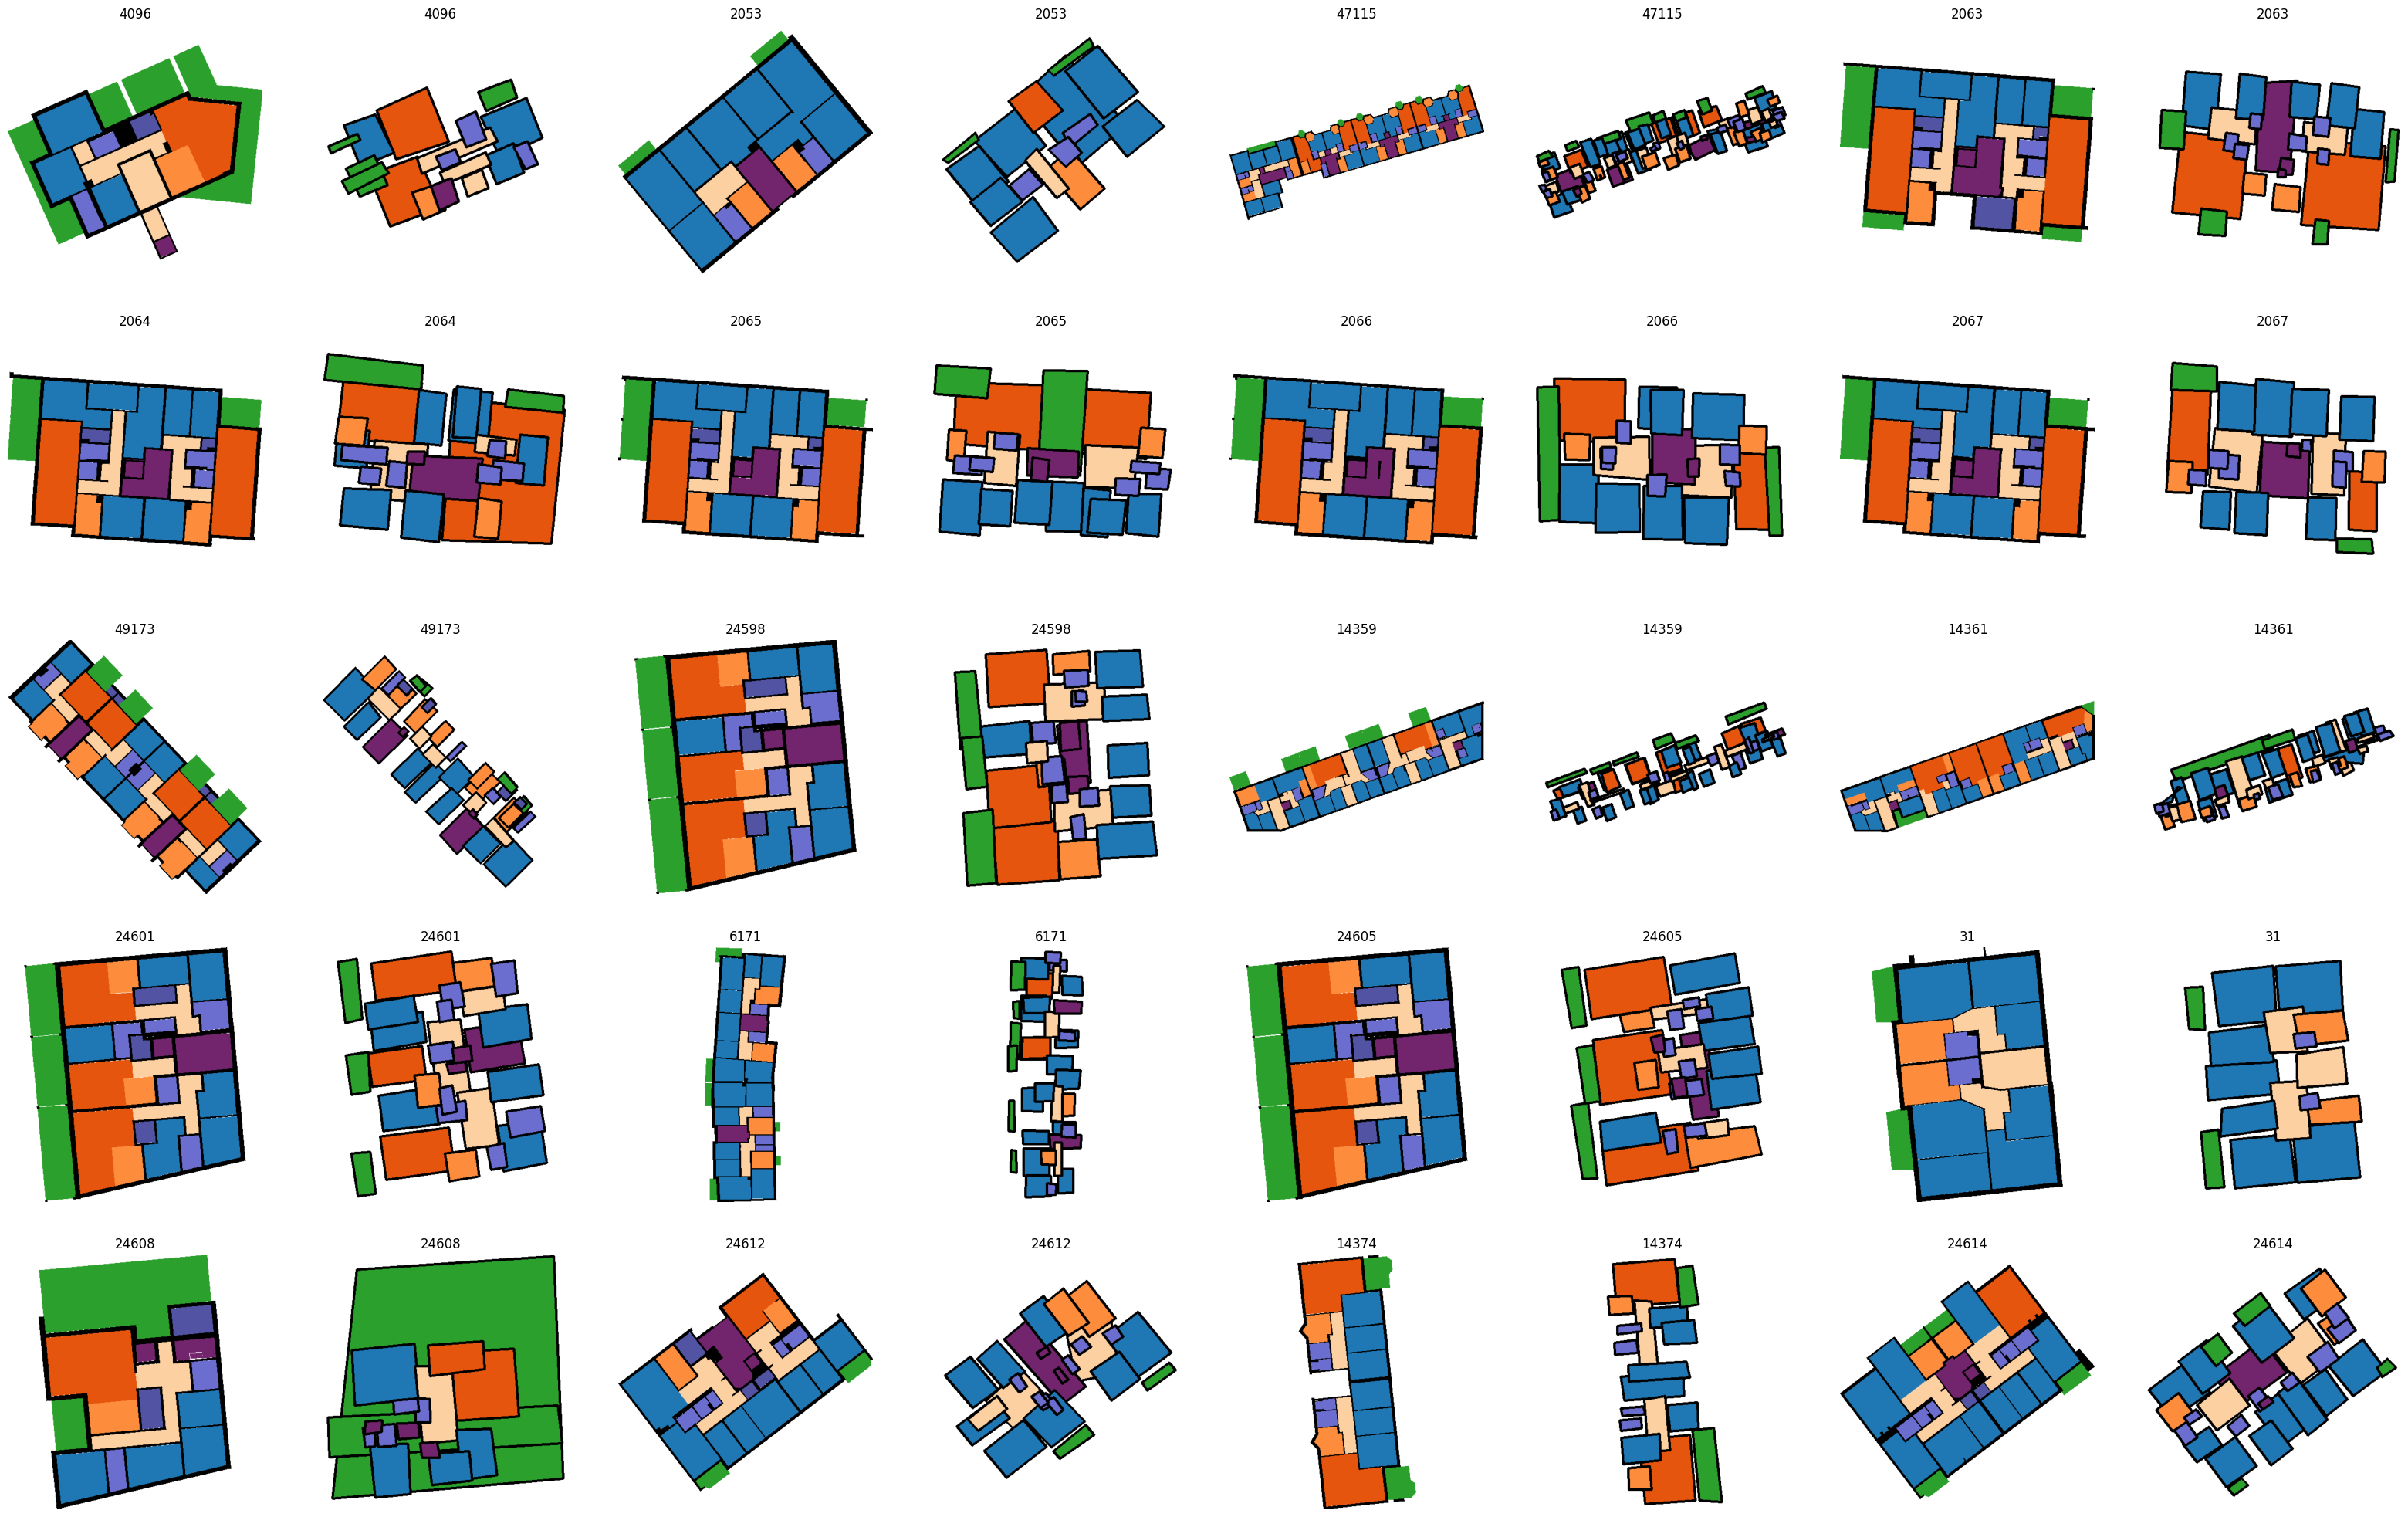

In [2]:
CLASSES = np.arange(0, 10)
def load_image(path, kind='ref'):
    if kind == 'sub':
        img = (plt.imread(path)*255).astype(np.uint8)
    elif kind == 'ref':
        img = np.load(os.path.join(path))[..., 0].astype(np.uint8)
    else:
        raise NotImplementedError
    return img

ids = list(ids_sub)
fig, axs = plt.subplots(ncols=8, nrows=5, figsize=(5 * 8, 5 * 5))
axs = axs.flatten()
for i, ax in enumerate(axs):
    id = ids[int(np.floor(i/2))]

    if i % 2 == 1:
        img = load_image(os.path.join(sub_root, f'{id}.png'), kind='sub')
        ax.imshow(colorize_floorplan(img, classes=CLASSES, cmap=CMAP_ROOMTYPE))
        ax.set_title(f'{id}')
        ax.axis('off')

    # ground truth
    else:
        img = load_image(os.path.join(ref_root, f'{id}.npy'), kind='ref')
        ax.imshow(colorize_floorplan(img, classes=CLASSES, cmap=CMAP_ROOMTYPE))
        ax.set_title(f'{id}')
        ax.axis('off')

## Visualization

### 3 column * 4

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from evaluation.constants import CMAP_ROOMTYPE
from evaluation.utils import colorize_floorplan

datapath_reference = "model/datasets/modified-swiss-dwellings-v2/test"
datapath_submission_kind1 = "model/scripts/inference_msd/modified_swiss_dwellings_val_ema_0.9999_070000"
datapath_submission_kind2 = "model/scripts/inference_msd/modified_swiss_dwellings_val_ema_0.9999_080000"

sub_name = "submission"
ref_root = os.path.join(datapath_reference, 'full_out')
sub_root_kind1 = os.path.join(datapath_submission_kind1, sub_name)
sub_root_kind2 = os.path.join(datapath_submission_kind2, sub_name)

ids_ref = sorted([int(f[:-4]) for f in os.listdir(ref_root)])
ids_sub_kind1 = sorted([int(f[:-4]) for f in os.listdir(sub_root_kind1)])
ids_sub_kind2 = sorted([int(f[:-4]) for f in os.listdir(sub_root_kind2)])

print(len(ids_ref), len(ids_sub_kind1), len(ids_sub_kind2))
def load_image(path, kind='ref'):
    if kind == 'sub':
        img = (plt.imread(path) * 255).astype(np.uint8)
    elif kind == 'ref':
        img = np.load(os.path.join(path))[..., 0].astype(np.uint8)
    else:
        raise NotImplementedError
    return img

791 791 791


In [ ]:
CLASSES = np.arange(0, 10)
fig, axs = plt.subplots(nrows=5, ncols=12, figsize=(5 * 12, 5 * 5))
axs = axs.flatten()
for i, ax in enumerate(axs):
    idx = i // 3
    column_type = i % 3  # 0 -> ref, 1 -> sub_kind1, 2 -> sub_kind2

    if idx >= len(ids_ref) or (column_type == 1 and idx >= len(ids_sub_kind1)) or (column_type == 2 and idx >= len(ids_sub_kind2)):
        ax.axis('off')
        continue
    
    if column_type == 0:
        img_id = ids_ref[idx]
        img_path = os.path.join(ref_root, f'{img_id}.npy')
        img = load_image(img_path, kind='ref')
    elif column_type == 1:
        img_id = ids_sub_kind1[idx]
        img_path = os.path.join(sub_root_kind1, f'{img_id}.png')
        img = load_image(img_path, kind='sub')
    else:
        img_id = ids_sub_kind2[idx]
        img_path = os.path.join(sub_root_kind2, f'{img_id}.png')
        img = load_image(img_path, kind='sub')
        
    ax.imshow(colorize_floorplan(img, classes=CLASSES, cmap=CMAP_ROOMTYPE))
    ax.set_title(f'ID: {img_id}')
    ax.axis('off')

plt.tight_layout()
# plt.show()

### 3 column * 2

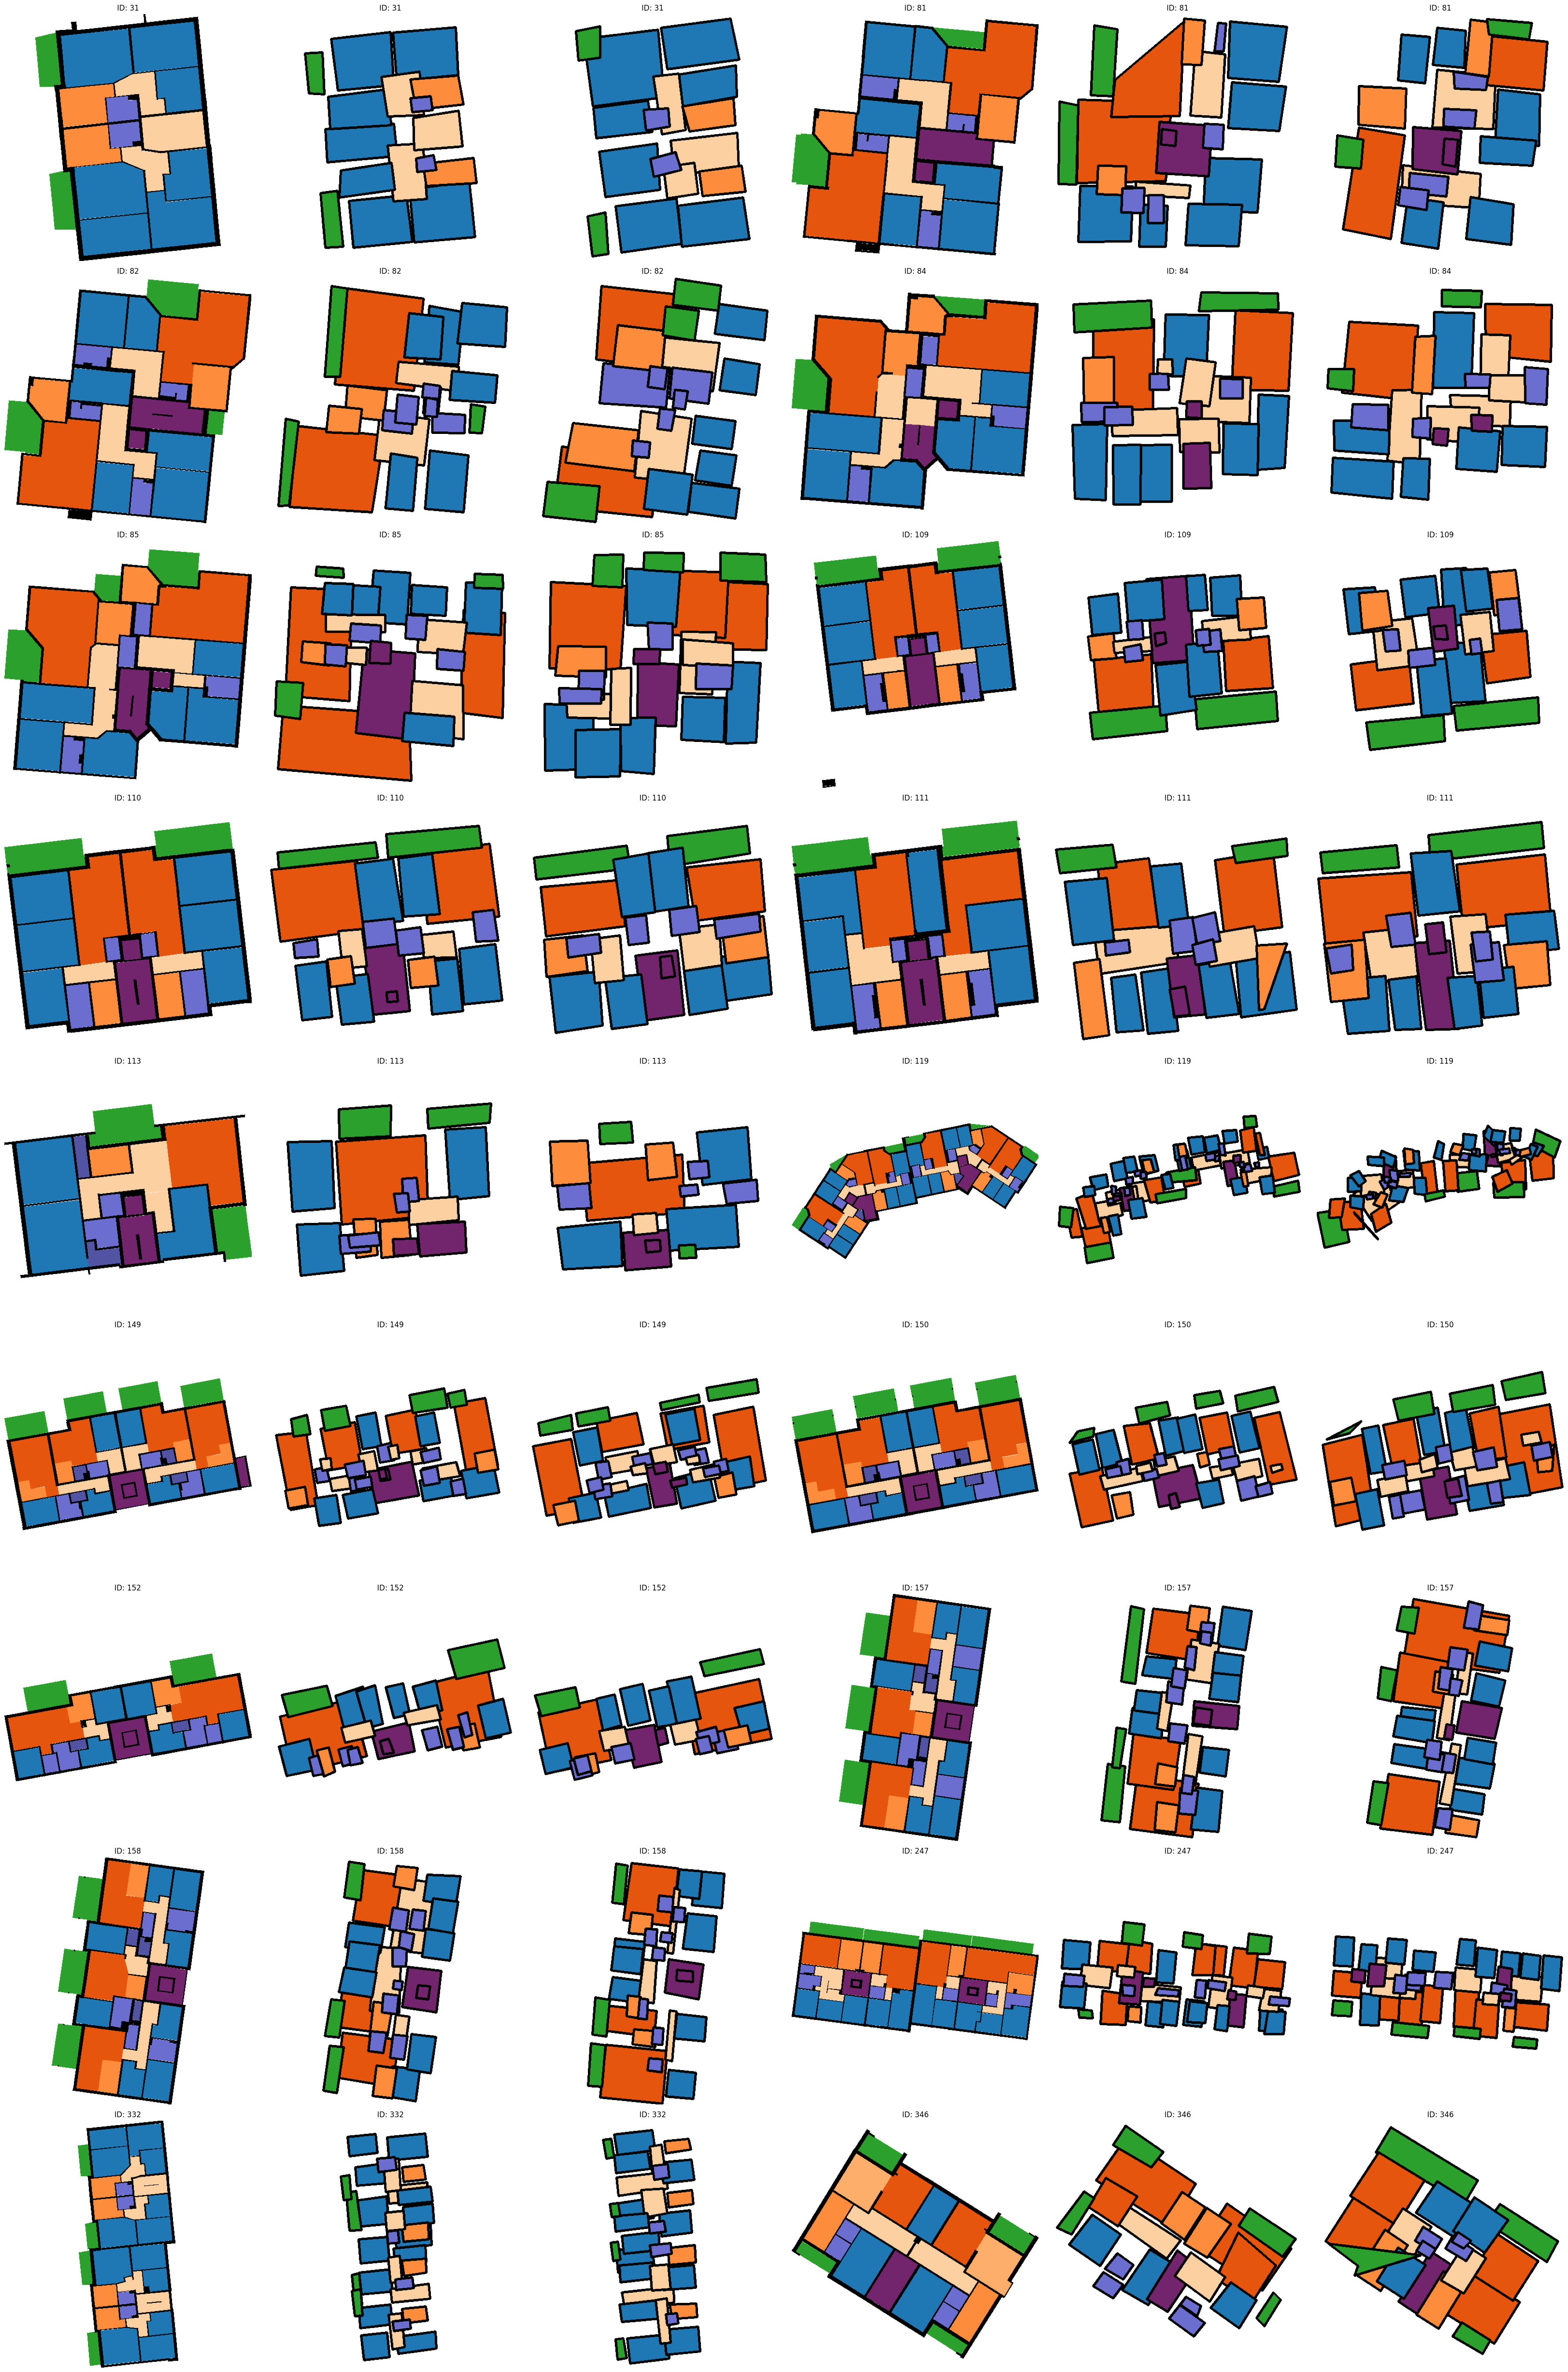

In [4]:
CLASSES = np.arange(0, 10)
fig, axs = plt.subplots(nrows=9, ncols=6, figsize=(6 * 6, 9 * 6))
axs = axs.flatten()

for i, ax in enumerate(axs):
    idx = i // 3
    column_type = i % 3

    if idx >= len(ids_ref) or (column_type == 1 and idx >= len(ids_sub_kind1)) or (column_type == 2 and idx >= len(ids_sub_kind2)):
        ax.axis('off')
        continue

    if column_type == 0:
        img_id = ids_ref[idx]
        img_path = os.path.join(ref_root, f'{img_id}.npy')
        img = load_image(img_path, kind='ref')
    elif column_type == 1:
        img_id = ids_sub_kind1[idx]
        img_path = os.path.join(sub_root_kind1, f'{img_id}.png')
        img = load_image(img_path, kind='sub')
    else:
        img_id = ids_sub_kind2[idx]
        img_path = os.path.join(sub_root_kind2, f'{img_id}.png')
        img = load_image(img_path, kind='sub')
    
    ax.imshow(colorize_floorplan(img, classes=CLASSES, cmap=CMAP_ROOMTYPE))
    ax.set_title(f'ID: {img_id}')
    ax.axis('off')

plt.tight_layout()
plt.show()

### save 1*3

In [ ]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from evaluation.constants import CMAP_ROOMTYPE
# from evaluation.utils import colorize_floorplan

# from tqdm import tqdm

# datapath_reference = "model/datasets/modified-swiss-dwellings-v2/test"
# # datapath_submission_kind1 = "model/scripts/inference_msd/modified_swiss_dwellings_test_model070000"
# # datapath_submission_kind2 = "model/scripts/inference_msd/modified_swiss_dwellings_test_model080000"

# datapath_submission_kind3 = "model/scripts/inference_msd/modified_swiss_dwellings_val_ema_0.9999_070000"
# # datapath_submission_kind4 = "model/scripts/inference_msd/modified_swiss_dwellings_val_ema_0.9999_080000"

# # datapath_submission_kind5 = "model/scripts/inference_msd/modified_swiss_dwellings_val_model070000_v2"
# datapath_submission_kind6 = "model/scripts/inference_msd/modified_swiss_dwellings_val_ema_0.9999_070000_v2"

# datapath_submission_kind7 = "model/scripts/inference_msd/modified_swiss_dwellings_val_inference_msd_ema_6corners"

# sub_name = "submission"
# ref_root = os.path.join(datapath_reference, 'full_out')
# sub_root_kind1 = os.path.join(datapath_submission_kind1, sub_name)
# sub_root_kind2 = os.path.join(datapath_submission_kind2, sub_name)

# ids_ref = sorted([int(f[:-4]) for f in os.listdir(ref_root)])
# ids_sub_kind1 = sorted([int(f[:-4]) for f in os.listdir(sub_root_kind1)])
# ids_sub_kind2 = sorted([int(f[:-4]) for f in os.listdir(sub_root_kind2)])


# CLASSES = np.arange(0, 10)
# output_dir = "./outputs/raws"
# os.makedirs(output_dir, exist_ok=True)

# for row_idx in tqdm(range(len(ids_ref)), desc="Processing Rows"):
#     fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

#     for col_idx, ax in enumerate(axs):
#         if col_idx == 0:  # 第一列：ref
#             if row_idx >= len(ids_ref):
#                 ax.axis('off')
#                 continue
#             img_id = ids_ref[row_idx]
#             img_path = os.path.join(ref_root, f'{img_id}.npy')
#             img = load_image(img_path, kind='ref')
#             title = f'Reference ID: {img_id}'
#         elif col_idx == 1:
#             if row_idx >= len(ids_sub_kind1):
#                 ax.axis('off')
#                 continue
#             img_id = ids_sub_kind1[row_idx]
#             img_path = os.path.join(sub_root_kind1, f'{img_id}.png')
#             img = load_image(img_path, kind='sub')
#             title = f'Submission 1 ID: {img_id}'
#         elif col_idx == 2:
#             if row_idx >= len(ids_sub_kind2):
#                 ax.axis('off')
#                 continue
#             img_id = ids_sub_kind2[row_idx]
#             img_path = os.path.join(sub_root_kind2, f'{img_id}.png')
#             img = load_image(img_path, kind='sub')
#             title = f'Submission 2 ID: {img_id}'
        
#         ax.imshow(colorize_floorplan(img, classes=CLASSES, cmap=CMAP_ROOMTYPE))
#         ax.set_title(title, fontsize=10, pad=10)  # 调整字体大小和间距
#         ax.axis('off')

#     row_output_path = os.path.join(output_dir, f'row_{row_idx:03d}.png')
#     plt.tight_layout()
#     plt.savefig(row_output_path, bbox_inches='tight')
#     plt.close(fig)


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from evaluation.constants import CMAP_ROOMTYPE
from evaluation.utils import colorize_floorplan

from tqdm import tqdm

datapath_reference = "model/datasets/modified-swiss-dwellings-v2/test"

datapath_submission_kind3 = "model/scripts/inference_msd/modified_swiss_dwellings_val_ema_0.9999_070000"
datapath_submission_kind6 = "model/scripts/inference_msd/modified_swiss_dwellings_val_ema_0.9999_070000_v2"
datapath_submission_kind7 = "model/scripts/inference_msd/modified_swiss_dwellings_val_inference_msd_ema_6corners"

sub_name = "submission"
ref_root = os.path.join(datapath_reference, 'full_out')
sub_root_kind3 = os.path.join(datapath_submission_kind3, sub_name)
sub_root_kind6 = os.path.join(datapath_submission_kind6, sub_name)
sub_root_kind7 = os.path.join(datapath_submission_kind7, sub_name)

ids_ref = sorted([int(f[:-4]) for f in os.listdir(ref_root)])
ids_sub_kind3 = sorted([int(f[:-4]) for f in os.listdir(sub_root_kind3)])
ids_sub_kind6 = sorted([int(f[:-4]) for f in os.listdir(sub_root_kind6)])
ids_sub_kind7 = sorted([int(f[:-4]) for f in os.listdir(sub_root_kind7)])


CLASSES = np.arange(0, 10)
output_dir = "./outputs/raws_new"
os.makedirs(output_dir, exist_ok=True)

for row_idx, img_id in tqdm(enumerate(ids_sub_kind3), desc="Processing Rows"):
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

    sources = [
        (ref_root, ids_ref, 'ref', 'Reference ID: {}'),
        (sub_root_kind3, ids_sub_kind3, 'sub', 'Submission 3 ID: {}'),
        (sub_root_kind6, ids_sub_kind6, 'sub', 'Submission 6 ID: {}'),
        (sub_root_kind7, ids_sub_kind7, 'sub', 'Submission 7 ID: {}'),
    ]

    for col_idx, ax in enumerate(axs):
        root, ids_list, kind, title_format = sources[col_idx]

        if row_idx >= len(ids_list):
            ax.axis('off')  # 如果超出索引范围，隐藏当前列
            continue

        img_id = ids_list[row_idx]
        img_path = os.path.join(root, f'{img_id}.npy' if kind == 'ref' else f'{img_id}.png')
        img = load_image(img_path, kind=kind)

        title = title_format.format(img_id)
        ax.imshow(colorize_floorplan(img, classes=CLASSES, cmap=CMAP_ROOMTYPE))
        # ax.set_title(title, fontsize=10, pad=10)  # 设置标题
        ax.axis('off')

    row_output_path = os.path.join(output_dir, f'row_{row_idx:03d}.png')
    plt.tight_layout()
    plt.savefig(row_output_path, bbox_inches='tight')
    plt.close(fig)


# for row_idx in tqdm(range(len(ids_sub_kind3)), desc="Processing Rows"):
#     fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

#     for col_idx, ax in enumerate(axs):
#         if col_idx == 0:  # 第一列：ref
#             if row_idx >= len(ids_ref):
#                 ax.axis('off')
#                 continue
#             img_id = ids_ref[row_idx]
#             img_path = os.path.join(ref_root, f'{img_id}.npy')
#             img = load_image(img_path, kind='ref')
#             title = f'Reference ID: {img_id}'
#         elif col_idx == 1:
#             if row_idx >= len(ids_sub_kind3):
#                 ax.axis('off')
#                 continue
#             img_id = ids_sub_kind3[row_idx]
#             img_path = os.path.join(sub_root_kind3, f'{img_id}.png')
#             img = load_image(img_path, kind='sub')
#             title = f'Submission 3 ID: {img_id}'
#         elif col_idx == 2:
#             if row_idx >= len(ids_sub_kind6):
#                 ax.axis('off')
#                 continue
#             img_id = ids_sub_kind6[row_idx]
#             img_path = os.path.join(sub_root_kind6, f'{img_id}.png')
#             img = load_image(img_path, kind='sub')
#             title = f'Submission 6 ID: {img_id}'
#         elif col_idx == 3:
#             if row_idx >= len(ids_sub_kind7):
#                 ax.axis('off')
#                 continue
#             img_id = ids_sub_kind7[row_idx]
#             img_path = os.path.join(sub_root_kind7, f'{img_id}.png')
#             img = load_image(img_path, kind='sub')
#             title = f'Submission 7 ID: {img_id}'
        
#         ax.imshow(colorize_floorplan(img, classes=CLASSES, cmap=CMAP_ROOMTYPE))
#         ax.set_title(title, fontsize=10, pad=10)  # 调整字体大小和间距
#         ax.axis('off')

#     row_output_path = os.path.join(output_dir, f'row_{row_idx:03d}.png')
#     plt.tight_layout()
#     plt.savefig(row_output_path, bbox_inches='tight')
#     plt.close(fig)


Processing Rows: 791it [02:59,  4.41it/s]


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from evaluation.constants import CMAP_ROOMTYPE
from evaluation.utils import colorize_floorplan
from tqdm import tqdm

datapath_reference = "model/datasets/modified-swiss-dwellings-v2/test"

datapath_submission_kind3 = "model/scripts/inference_msd/modified_swiss_dwellings_val_ema_0.9999_070000"
datapath_submission_kind6 = "model/scripts/inference_msd/modified_swiss_dwellings_val_ema_0.9999_070000_v2"
datapath_submission_kind7 = "model/scripts/inference_msd/modified_swiss_dwellings_val_inference_msd_ema_6corners"

sub_name = "submission"
ref_root = os.path.join(datapath_reference, 'full_out')
sub_root_kind3 = os.path.join(datapath_submission_kind3, sub_name)
sub_root_kind6 = os.path.join(datapath_submission_kind6, sub_name)
sub_root_kind7 = os.path.join(datapath_submission_kind7, sub_name)

ids_ref = sorted([int(f[:-4]) for f in os.listdir(ref_root)])
ids_sub_kind3 = sorted([int(f[:-4]) for f in os.listdir(sub_root_kind3)])
ids_sub_kind6 = sorted([int(f[:-4]) for f in os.listdir(sub_root_kind6)])
ids_sub_kind7 = sorted([int(f[:-4]) for f in os.listdir(sub_root_kind7)])

CLASSES = np.arange(0, 10)
output_dir = "./outputs/raws_new_2raws"
os.makedirs(output_dir, exist_ok=True)

def load_image(path, kind='ref'):
    if kind == 'sub':
        img = (plt.imread(path) * 255).astype(np.uint8)
    elif kind == 'ref':
        img = np.load(os.path.join(path))[..., 0].astype(np.uint8)
    else:
        raise NotImplementedError
    return img

for row_idx, img_id in tqdm(enumerate(ids_sub_kind3), desc="Processing Rows"):
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

    sources = [
        (ref_root, ids_ref, 'ref', 'Reference ID: {}'),
        (sub_root_kind3, ids_sub_kind3, 'sub', 'Submission 3 ID: {}'),
        (sub_root_kind6, ids_sub_kind6, 'sub', 'Submission 6 ID: {}'),
        (sub_root_kind7, ids_sub_kind7, 'sub', 'Submission 7 ID: {}'),
    ]

    # 第一行: 仅显示 Reference
    root, ids_list, kind, title_format = sources[0]
    if row_idx < len(ids_list):
        img_id = ids_list[row_idx]
        img_path = os.path.join(root, f'{img_id}.npy')
        img = load_image(img_path, kind=kind)

        axs[0, 1].imshow(colorize_floorplan(img, classes=CLASSES, cmap=CMAP_ROOMTYPE))
        axs[0, 1].set_title(title_format.format(img_id), fontsize=10, pad=10)
        axs[0, 0].axis('off')  # 左侧空白
        axs[0, 2].axis('off')  # 右侧空白
    else:
        for ax in axs[0]:
            ax.axis('off')

    # 第二行: 显示其余三张图片
    for col_idx, ax in enumerate(axs[1]):
        root, ids_list, kind, title_format = sources[col_idx + 1]

        if row_idx >= len(ids_list):
            ax.axis('off')  # 如果超出索引范围，隐藏当前列
            continue

        img_id = ids_list[row_idx]
        img_path = os.path.join(root, f'{img_id}.png')
        img = load_image(img_path, kind=kind)

        ax.imshow(colorize_floorplan(img, classes=CLASSES, cmap=CMAP_ROOMTYPE))
        ax.set_title(title_format.format(img_id), fontsize=10, pad=10)
        ax.axis('off')

    row_output_path = os.path.join(output_dir, f'row_{row_idx:03d}.png')
    plt.tight_layout()
    plt.savefig(row_output_path, bbox_inches='tight')
    plt.close(fig)


Processing Rows: 791it [04:51,  2.71it/s]


In [ ]:
# 找出 ids_ref 中有，但其他集合中都没有的 ID
missing_ids = set(ids_ref) - (set(ids_sub_kind3) | set(ids_sub_kind6) | set(ids_sub_kind7))

# 输出结果
print("IDs in ids_ref but missing in others:", sorted(missing_ids))


## Random select

In [ ]:
import os
import random
import shutil

output_dir = "/home/mingyang/workspace/layout/floorplan/experiments/house-diffusion/outputs/raws"
raw_random_dir = "/home/mingyang/workspace/layout/floorplan/experiments/house-diffusion/outputs/raw_random"

os.makedirs(raw_random_dir, exist_ok=True)
all_images = [f for f in os.listdir(output_dir) if f.endswith('.png') or f.endswith('.jpg')]
random_images = random.sample(all_images, 30)
for img in random_images:
    src_path = os.path.join(output_dir, img)
    dest_path = os.path.join(raw_random_dir, img)
    shutil.copy(src_path, dest_path)

print(f"已随机选择并复制 {len(random_images)} 张图片到 {raw_random_dir} 目录.")
